In [1]:
# numpy and pandas for data manipulation
import sys
# Suppress warnings
import warnings
import seaborn as sns
import matplotlib as plt
import networkx as nx
import numpy as np
import pandas as pd
import os
import matplotlib2tikz
plt.style.use('seaborn')
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=4)
plt.rc('hatch', color='white', linewidth=1)
plt.rcParams.update({
    "font.family": "serif",
     "font.serif": [] ,
      "font.sans-serif": []  })
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
ROOT_RESULT_FOLDER = '/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/experiment_results/remote'


SYSTEM_COLOR = sns.color_palette()[0]
BASELINE_COLOR = sns.color_palette()[1]

WRITE_DIRECTORY_ROOT = \
'/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/papers/images/experiment-results/'

output_directory = WRITE_DIRECTORY_ROOT + 'kaggle_home_credit/execution_time/repetition'
def create_folder(path):
    if not os.path.exists(os.path.dirname(path)):
        try:
            os.makedirs(os.path.dirname(path))
        except OSError as exc:  # Guard against race condition
            if exc.errno != errno.EEXIST:
                raise

In [2]:
result_folder = ROOT_RESULT_FOLDER + '/execution_time/repetition/kaggle_home_credit'
result_file = result_folder + '/cloud-41/2019-10-02.csv'

In [3]:
HEADERS = [
    'timestamp', 'exp_id', 'repo', 'workload','type', 'rep', 'mat_rate',
    'run_time'
]
method_map = {'optimized':'CO','baseline':'KG'}
execution_times = pd.read_csv(result_file, header=None, names=HEADERS)
execution_times['type'] = execution_times['type'].replace(method_map)
execution_times['cumulative_run_time'] = execution_times.groupby(['exp_id','workload','type'])['run_time'].apply(lambda x: x.cumsum())

In [4]:
def plot_executions_reuse(df, loc=''):
    cat = sns.catplot(
        data=df,
        x='rep',
        y='run_time',
        hue='type',
        kind='bar',
        ci=99,
        hue_order=['KG', 'CO'],
        palette={
            'CO': SYSTEM_COLOR,
            'KG': BASELINE_COLOR
        },
        legend=False)
    #top = df['run_time'].max()
    #cat.set_axis_labels('Execution Number', 'Run Time (s)')
    cat.set_xlabels('Run', fontsize=38)
    cat.set_ylabels('Run Time (s)', fontsize=38)
    #cat.set(ylim=(0, top + 100))
    plt.tick_params(labelsize = 36)
    
    num_executions = len(df.rep.unique())
    for i, bar in enumerate(cat.ax.patches):
        if i < num_executions:
            h = '/'
        else:
            h = 'x'
        bar.set_edgecolor('lightgray')
        bar.set_hatch(h)
        
    lg = plt.legend(loc='upper center', fontsize=38, ncol = 2, columnspacing=-1, bbox_to_anchor=(0.4,1.22))
    lg.legendHandles[0].xy = (60,0)
    lg.legendHandles[1].xy = (60,0)
    lg.legendHandles[0]._width = 31
    lg.legendHandles[1]._width = 31


    cat.savefig(loc, bbox_inches ='tight')

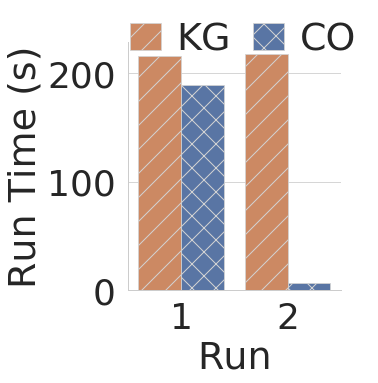

In [5]:
df = execution_times[execution_times['workload'] == 'introduction_to_manual_feature_engineering']
path = output_directory+'/introduction_to_manual_feature_engineering.pgf'
create_folder(path=path)
plot_executions_reuse(df, path)

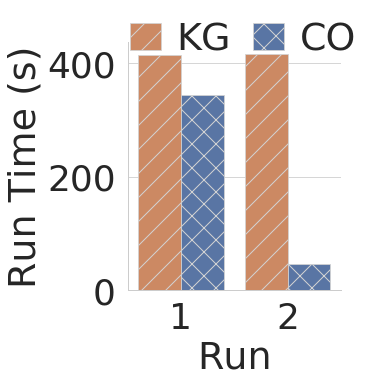

In [6]:
df = execution_times[execution_times['workload'] == 'introduction_to_manual_feature_engineering_p2']
path = output_directory+'/introduction_to_manual_feature_engineering_p2.pgf'
create_folder(path=path)
plot_executions_reuse(df, path)

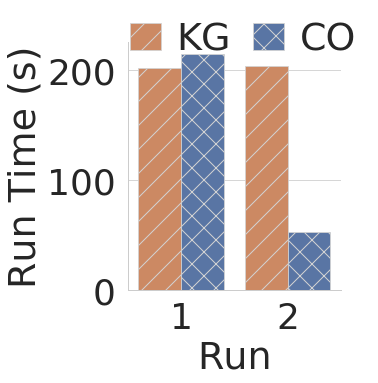

In [7]:
df = execution_times[execution_times['workload'] == 'start_here_a_gentle_introduction']
path = output_directory+'/start_here_a_gentle_introduction.pgf'
create_folder(path=path)
plot_executions_reuse(df, path)